<a href="https://colab.research.google.com/github/KonchadaSaiVardhan/USER-PROFILING-SEGMENTATION/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset

In [17]:
df = pd.read_csv("/content/user_profiles_for_ads.csv")

# Drop unnecessary column

In [18]:
df = df.drop(columns=["User ID"])

In [19]:
df.head()

,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


# Convert 'Top Interests' to list for MultiLabelBinarizer

In [20]:
df["Top Interests"] = df["Top Interests"].apply(lambda x: [i.strip() for i in x.split(',')])

# Separate categorical and numerical columns

In [21]:
categorical_cols = ["Age", "Gender", "Location", "Language", "Education Level", "Device Usage", "Income Level"]
numerical_cols = [
    "Likes and Reactions", "Followed Accounts",
    "Time Spent Online (hrs/weekday)", "Time Spent Online (hrs/weekend)",
    "Click-Through Rates (CTR)", "Conversion Rates", "Ad Interaction Time (sec)"
]


# One-hot encode categorical features

In [22]:
df_encoded = pd.get_dummies(df[categorical_cols])

# Binarize multi-label interests

In [23]:
mlb = MultiLabelBinarizer()
interests_encoded = mlb.fit_transform(df["Top Interests"])
interests_df = pd.DataFrame(interests_encoded, columns=mlb.classes_)

# Combine all features

In [24]:
X = pd.concat([df[numerical_cols], df_encoded, interests_df], axis=1)

# Scale features

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering

In [26]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)


# PCA for visualization

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters

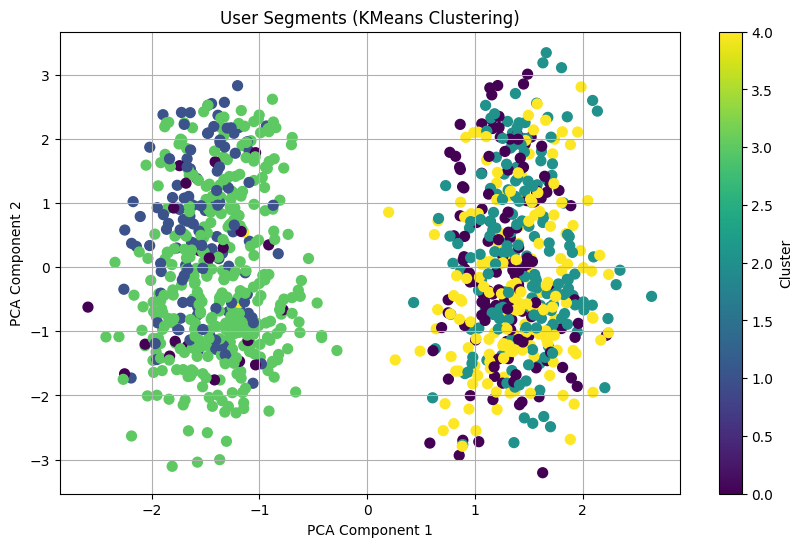

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Segment'], cmap='viridis', s=50)
plt.title('User Segments (KMeans Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Optional: Save clustered dataset

In [29]:
df.to_csv("segmented_user_profiles.csv", index=False)

In [14]:
from google.colab import files
files.download("segmented_user_profiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>